## PHYS 2300 Uncertainty Review

In your first year physics lab course, you learned that no matter how carefully we make a measurement, we can never eliminate all sources of uncertainty. Any numerical, scientific result is *useless* unless its uncertainty is understood, quantified and communicated. Remember, the course syllabus states that *"if you do not include a reasonable treatment of uncertainty in your lab report, your mark will be halved."* __OUCH__. 

What's a *"reasonable treatment of uncertainty"*? Well, that depends. There's no one-size-fits-all recipe that will work in all cases, but there are plenty of ways to go wrong. These notes will provide some examples of good practices for dealing with the types of uncertainties you might encounter in the PHYS 2300 lab. This review is available as a jupyter notebook at _______.

### Significant Digits
After a measurement is completed, the result must be presented with a number of significant digits compatible with the precision of the measurement. Any intermediate calculations should use a higher degree of precision (lots and lots of digits) to prevent rounding errors to accumulate and skew the result. Remember that when a number ends with zeros, they're significant! Some examples:
- $1.88\pm0.06\,\mu \mathrm{m}$
- $35600\pm200\,Hz$ can be better expressed as $(3.56\pm0.02)\times 10^4\,Hz$ or $3.56\pm0.02\,kHz$
- $9.374\pm0.027\,\mathrm{mV}$ is okay only if the *imprecision itself is known with sufficient precision*. If not, the value should be expressed as $9.37\pm0.03\,\mathrm{mV}$
- When the uncertainty in a quantity is excluded, an uncertainty of the last digit  $\pm0.5$ is assumed. i.e. $2.5$ means $2.50\pm0.05$ and $2.50$ means $2.500\pm0.005$. DON'T DO THIS IN YOUR LAB REPORTS. ALWAYS REPORT EXPLICIT UNCERTAINTIES. I include this only so you'll be able to deal with numbers thrown around carelessly by inconsiderate degenerates.

### Uncertainty in a Single Measurement
When making a measurement of a single value, you'll need to use your judgement to decide what a reasonable uncertainty is. This means considering both the limiting precision of the instrument (e.g. the tick marks on your ruler, the number of digits dead out on a digital display, the stated uncertainty of various instruments we'll use in the lab) as well as the circumstance of your measurement. This is another case where there is no right answer, but there are many very bad answers. Use your judgement and explain your reasoning.




### Probability Distributions
In your first year lab, you learned about Gaussian Error Propagation. This means that we always assumed that the unknown quantity we were measuring had an underlying Gaussian distribution - a Bell curve centered on $\mu$. In these cases, if we take a large number of measurements of the same quantity and make a histogram of the results, we should get something like this:

![A Gaussian Distribution](Empirical_Rule.PNG)

With this assumption that our distributions are Gaussian, the uncertainty we usually state is $\sigma$, the standard deviation. 68% of the area under the Gaussian curve is lumped between $\mu-\sigma$ and $\mu+\sigma$. The curve is defined by the equation:

$$
\begin{equation*}
f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\sigma ^{2}\pi }}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}
\end{equation*}
$$


Some important properties of such a distribution (or any distribution) include:
- __The Mean__: $A={\frac {1}{n}}\sum _{i=1}^{n}a_{i}$, the sum of all measurements divided by the total number of measurements.
- __The Median__: Half of the values are larger than this value, and half are smaller (in technical terms, the value at which the cumulative distribution function reached 50%)
- __The Mode__: The most probable value, the one where the histogram of the dataset is at its highest value.

For a nice, symmetric Gaussian distribution, all 3 of these quantities are the same, but this isn't always the case.

Let's look at some Pokemon stats (using the [Pokemon with Stats dataset from Kaggle](https://www.kaggle.com/abcsds/pokemon) for a quick look at a non-Gaussian distribution. This dataset contains vital statistics on 800 Pokemon. Let's first look at the distribution of HP.

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 10)
df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


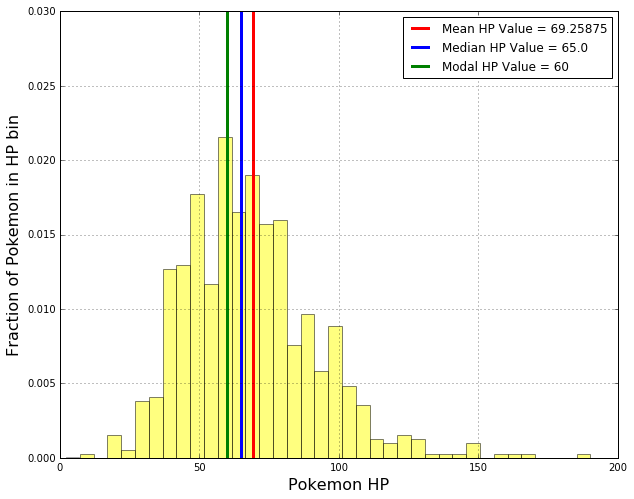

In [163]:
plt.hist(df.HP,range=(2.2,200),bins=40,color='yellow',normed=True,alpha=0.5)
plt.grid()
plt.gcf().set_size_inches(10,8)
plt.ylim(0,0.03)
plt.xlabel('Pokemon HP',fontsize=16)
plt.ylabel('Fraction of Pokemon in HP bin',fontsize=16)
plt.vlines(df.HP.mean(),0,1,lw=3,color='red',label='Mean HP Value = '+str(df.HP.mean()))
plt.vlines(df.HP.median(),0,1,lw=3,color='blue',label='Median HP Value = '+str(df.HP.median()))
plt.vlines(df.HP.mode(),0,1,lw=3,color='green',label='Modal HP Value = '+str(df.HP.mode()[0]))
plt.legend()

### Propagation of Uncertainty
When we need to make a calculation including multiple measured quantities we need to combine the uncertainties of each appropriately. *Independent uncertainties add in quadrature*. In general terms, for a function $f(x,y,z)$ where $x,y,z$ have uncertainties $\sigma_x,\sigma_y,\sigma_z$

$$
\begin{equation*}
{\displaystyle \sigma_{f}={\sqrt {\left({\frac {\partial f}{\partial x}}\right)^{2}\sigma_{x}^{2}+\left({\frac {\partial f}{\partial y}}\right)^{2}\sigma_{y}^{2}+\left({\frac {\partial f}{\partial z}}\right)^{2}\sigma_{z}^{2}}}}
\end{equation*}
$$

For a concrete example, let's say that we wanna be the very best and have determined that the most useful statistic to classify our Pokemon is the Composite Attack Index, $I_{CA}$.

$$
\begin{equation*}
I_{CA} = \frac{\mathrm{P}_{\mathrm{attack}}\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})}
\end{equation*}
$$

where $\mathrm{P}_{\mathrm{attack}}$ is the pokemon's base modifier for normal attacks (eg. Scratch, Punch), $\mathrm{P}_{\mathrm{sp.attack}}$ is the pokemon's base modifier for special attacks (e.g. fire blast, bubble beam) and $\mathrm{P}_{\mathrm{HP}}$ is the pokemon's total hit points, or health, defines how much damage a pokemon can withstand before fainting. A __"Reasonable Treatment of Uncertainty"__ would include a derivation like what follows.

The uncertainty in $I_{CA}$ is then given by:

$$
\begin{equation*}
{\displaystyle \sigma_{I_{CA}}={\sqrt {\left({\frac {\partial I_{CA}}{\partial \mathrm{P}_{\mathrm{attack}}}}\right)^{2}\sigma_{\mathrm{P}_{\mathrm{attack}}}^{2}+\left({\frac {\partial I_{CA}}{\partial \mathrm{P}_{\mathrm{sp.attack}}}}\right)^{2}\sigma_{\mathrm{P}_{\mathrm{sp.attack}}}^{2}+\left({\frac {\partial I_{CA}}{\partial \mathrm{P}_{\mathrm{HP}}}}\right)^{2}\sigma_{\mathrm{P}_{\mathrm{HP}}}^{2}}}}
\end{equation*}.
$$

We need to solve for each of the partial derivatives.

$$
\begin{equation*}
\frac{\partial I_{CA}}{\partial \mathrm{P}_{\mathrm{attack}}}=\frac{\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})}
\end{equation*}
$$

$$
\begin{equation*}
\frac{\partial I_{CA}}{\partial \mathrm{P}_{\mathrm{sp.attack}}}=\frac{2.5\mathrm{P}_{\mathrm{attack}}\mathrm{P}_{\mathrm{sp.attack}}^{\,1.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})}
\end{equation*}
$$

$$
\begin{equation*}
\frac{\partial I_{CA}}{\partial \mathrm{P}_{\mathrm{HP}}}=\frac{65\mathrm{P}_{\mathrm{attack}}\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(\mathrm{P}_{\mathrm{HP}}-65)^2}
\end{equation*}
$$

Substituting these expresssions into the uncertainty equation gives

$$
\begin{equation*}
{\displaystyle\sigma_{I_{CA}}={\sqrt {\left({\frac{\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})}}\right)^{2}\sigma_{\mathrm{P}_{\mathrm{attack}}}^{2}+\left(\frac{2.5\mathrm{P}_{\mathrm{attack}}\mathrm{P}_{\mathrm{sp.attack}}^{\,1.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})}\right)^{2}\sigma_{\mathrm{P}_{\mathrm{sp.attack}}}^{2}+\left(\frac{65\mathrm{P}_{\mathrm{attack}}\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(\mathrm{P}_{\mathrm{HP}}-65)^2}\right)^{2}\sigma_{\mathrm{P}_{\mathrm{HP}}}^{2}}}}
\end{equation*}.
$$

Simplifying, we get
$$
\begin{equation*}
{\displaystyle\sigma_{I_{CA}}={\sqrt {{\frac{\mathrm{P}_{\mathrm{sp.attack}}^{\,5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})^2}}\sigma_{\mathrm{P}_{\mathrm{attack}}}^{2}+\frac{6.25\,\mathrm{P}_{\mathrm{attack}}^2\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})^2}\sigma_{\mathrm{P}_{\mathrm{sp.attack}}}^2+\frac{4225\,\mathrm{P}_{\mathrm{attack}}^2\mathrm{P}_{\mathrm{sp.attack}}^{\,5}}{(\mathrm{P}_{\mathrm{HP}}-65)^4}\sigma_{\mathrm{P}_{\mathrm{HP}}}^{2}}}}
\end{equation*}.
$$


We can now use this equation to calculate the Composite Attack Index for any pokemon we like. __Your lab reports must include an appendix with sample calculations. You can include derivations of uncertainty equations there, and should include an example of their use like this:__

#### Sample calculation of Composite Attack Index for Charmander
The instruments used to measure the properties are known to have a standard uncertainty of 5%. Charmander's characteristics are thus:

$$\mathrm{P}_{\mathrm{attack}}=52\pm3$$
$$\mathrm{P}_{\mathrm{sp.attack}}=60\pm3$$
$$\mathrm{P}_{\mathrm{HP}}=39\pm2$$

$$
\begin{equation*}
I_{CA} = \frac{\mathrm{P}_{\mathrm{attack}}\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})}
\end{equation*}
$$

$$
\begin{equation*}
I_{CA,\,Charmander} = \frac{52\times60^{\,2.5}}{(1-\frac{39}{65})}
\end{equation*}
$$

$$
\begin{equation*}
I_{CA,\,Charmander} = 3625112.412050142
\end{equation*}
$$

$$
\begin{equation*}
{\displaystyle\sigma_{I_{CA}}={\sqrt {{\frac{\mathrm{P}_{\mathrm{sp.attack}}^{\,4.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})^2}}\sigma_{\mathrm{P}_{\mathrm{attack}}}^{2}+\frac{6.25\,\mathrm{P}_{\mathrm{attack}}^2\mathrm{P}_{\mathrm{sp.attack}}^{\,2.5}}{(1-\frac{\mathrm{P}_{\mathrm{HP}}}{65})^2}\sigma_{\mathrm{P}_{\mathrm{sp.attack}}}^2+\frac{4225\,\mathrm{P}_{\mathrm{attack}}^2\mathrm{P}_{\mathrm{sp.attack}}^{\,5}}{(\mathrm{P}_{\mathrm{HP}}-65)^4}\sigma_{\mathrm{P}_{\mathrm{HP}}}^{2}}}}
\end{equation*}.
$$

$$
\begin{equation*}
{\displaystyle\sigma_{I_{CA,Charmander}}={\sqrt {{\frac{60^{\,4.5}}{(1-\frac{39}{65})^2}}3^{2}+\frac{6.25\times52^2\times60^{\,2.5}}{(1-\frac{39}{65})^2}3^2+\frac{4225\times52^2\times60^{\,5}}{(39-65)^4}2^{2}}}}
\end{equation*}
$$

$$
\begin{equation*}
{\displaystyle\sigma_{I_{CA,Charmander}}=331534.98191274941}
\end{equation*}
$$

$$
\begin{equation*}
{\displaystyle\sigma_{I_{CA,Charmander}}\doteq3.3\times10^5}
\end{equation*}
$$

Therefore, the value of the Composite Attack Index for Charmander is $I_{CA,Charmander}=(36.3\pm3.3)\times10^5$.